In [2]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from PIL import Image
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


# **Preprocessing**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gopiashokan/IMDB-Movie-Analysis-with-PowerBI/main/Dataset/IMDB_Movies_Dataset.csv')
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [ ]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
df[['num_critic_for_reviews','director_facebook_likes',
    'actor_3_facebook_likes','actor_1_facebook_likes',
    'num_voted_users','cast_total_facebook_likes',
    'facenumber_in_poster','num_user_for_reviews',
    'actor_2_facebook_likes','movie_facebook_likes']] = df[['num_critic_for_reviews','director_facebook_likes',
                                                            'actor_3_facebook_likes','actor_1_facebook_likes',
                                                            'num_voted_users','cast_total_facebook_likes',
                                                            'facenumber_in_poster','num_user_for_reviews',
                                                            'actor_2_facebook_likes','movie_facebook_likes']].fillna(0)

In [ ]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews         0
duration                      15
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews           0
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
df = df.dropna().reset_index(drop=True)
df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3756,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,Clean,3924,776,Don McKellar,1.0,jail|junkie|money|motel|singer,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,39,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
3757,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,The Circle,4555,5,Mojgan Faramarzi,0.0,abortion|bus|hospital|prison|prostitution,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,26,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
3758,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,changing the future|independent film|invention...,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,371,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
3759,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0
3760,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,John August,My Date with Drew,4285,163,Jon Gunn,0.0,actress name in title|crush|date|four word tit...,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,84,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [ ]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [ ]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews          object
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [ ]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [ ]:
df['num_critic_for_reviews'] = df['num_critic_for_reviews'].astype(int)
df['duration'] = df['duration'].astype(int)
df['director_facebook_likes'] = df['director_facebook_likes'].astype(int)
df['actor_3_facebook_likes'] = df['actor_3_facebook_likes'].astype(int)
df['actor_1_facebook_likes'] = df['actor_1_facebook_likes'].astype(int)
df['facenumber_in_poster'] = df['facenumber_in_poster'].astype(int)
df['num_user_for_reviews'] = df['num_user_for_reviews'].astype(int)
df['title_year'] = df['title_year'].astype(int)
df['actor_2_facebook_likes'] = df['actor_2_facebook_likes'].astype(int)

In [ ]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews         int64
duration                       int64
director_facebook_likes        int64
actor_3_facebook_likes         int64
actor_2_name                  object
actor_1_facebook_likes         int64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster           int64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews           int64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                     int64
actor_2_facebook_likes         int64
imdb_score                   float64
aspect_ratio                 float64
m

In [ ]:
df = df[['movie_imdb_link','color','movie_title','language','title_year','duration',
        'director_name','actor_1_name','actor_2_name','actor_3_name',
        'genres','country','budget','gross','plot_keywords','content_rating',
        'aspect_ratio','imdb_score','num_critic_for_reviews','num_user_for_reviews',
        'num_voted_users','director_facebook_likes','actor_1_facebook_likes',
        'actor_2_facebook_likes','actor_3_facebook_likes','cast_total_facebook_likes',
        'movie_facebook_likes','facenumber_in_poster']]
df.tail()

,movie_imdb_link,color,movie_title,language,title_year,duration,director_name,actor_1_name,actor_2_name,actor_3_name,genres,country,budget,gross,plot_keywords,content_rating,aspect_ratio,imdb_score,num_critic_for_reviews,num_user_for_reviews,num_voted_users,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,facenumber_in_poster
3756,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,Color,Clean,French,2004,110,Olivier Assayas,Maggie Cheung,Béatrice Dalle,Don McKellar,Drama|Music|Romance,France,4500.0,136007.0,jail|junkie|money|motel|singer,R,2.35,6.9,81,39,3924,107,576,133,45,776,171,1
3757,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,Color,The Circle,Persian,2000,90,Jafar Panahi,Fereshteh Sadre Orafaiy,Nargess Mamizadeh,Mojgan Faramarzi,Drama,Iran,10000.0,673780.0,abortion|bus|hospital|prison|prostitution,Not Rated,1.85,7.5,64,26,4555,397,5,0,0,5,697,0
3758,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,Color,Primer,English,2004,77,Shane Carruth,Shane Carruth,David Sullivan,Casey Gooden,Drama|Sci-Fi|Thriller,USA,7000.0,424760.0,changing the future|independent film|invention...,PG-13,1.85,7.0,143,371,72639,291,291,45,8,368,19000,0
3759,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,Color,El Mariachi,Spanish,1992,81,Robert Rodriguez,Carlos Gallardo,Peter Marquardt,Consuelo Gómez,Action|Crime|Drama|Romance|Thriller,USA,7000.0,2040920.0,assassin|death|guitar|gun|mariachi,R,1.37,6.9,56,130,52055,0,121,20,6,147,0,0
3760,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,Color,My Date with Drew,English,2004,90,Jon Gunn,John August,Brian Herzlinger,Jon Gunn,Documentary,USA,1100.0,85222.0,actress name in title|crush|date|four word tit...,PG,1.85,6.6,43,84,4285,16,86,23,16,163,456,0


In [ ]:
df = df.drop_duplicates('movie_imdb_link').reset_index(drop=True)

In [ ]:
df.tail()

,movie_imdb_link,color,movie_title,language,title_year,duration,director_name,actor_1_name,actor_2_name,actor_3_name,genres,country,budget,gross,plot_keywords,content_rating,aspect_ratio,imdb_score,num_critic_for_reviews,num_user_for_reviews,num_voted_users,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,facenumber_in_poster
3656,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,Color,Clean,French,2004,110,Olivier Assayas,Maggie Cheung,Béatrice Dalle,Don McKellar,Drama|Music|Romance,France,4500.0,136007.0,jail|junkie|money|motel|singer,R,2.35,6.9,81,39,3924,107,576,133,45,776,171,1
3657,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,Color,The Circle,Persian,2000,90,Jafar Panahi,Fereshteh Sadre Orafaiy,Nargess Mamizadeh,Mojgan Faramarzi,Drama,Iran,10000.0,673780.0,abortion|bus|hospital|prison|prostitution,Not Rated,1.85,7.5,64,26,4555,397,5,0,0,5,697,0
3658,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,Color,Primer,English,2004,77,Shane Carruth,Shane Carruth,David Sullivan,Casey Gooden,Drama|Sci-Fi|Thriller,USA,7000.0,424760.0,changing the future|independent film|invention...,PG-13,1.85,7.0,143,371,72639,291,291,45,8,368,19000,0
3659,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,Color,El Mariachi,Spanish,1992,81,Robert Rodriguez,Carlos Gallardo,Peter Marquardt,Consuelo Gómez,Action|Crime|Drama|Romance|Thriller,USA,7000.0,2040920.0,assassin|death|guitar|gun|mariachi,R,1.37,6.9,56,130,52055,0,121,20,6,147,0,0
3660,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,Color,My Date with Drew,English,2004,90,Jon Gunn,John August,Brian Herzlinger,Jon Gunn,Documentary,USA,1100.0,85222.0,actress name in title|crush|date|four word tit...,PG,1.85,6.6,43,84,4285,16,86,23,16,163,456,0


In [ ]:
for i in df:
    print(f"{i}:{df[i].nunique()}")

movie_imdb_link:3661
color:2
movie_title:3660
language:34
title_year:74
duration:152
director_name:1660
actor_1_name:1431
actor_2_name:2192
actor_3_name:2588
genres:745
country:45
budget:359
gross:3643
plot_keywords:3661
content_rating:12
aspect_ratio:18
imdb_score:74
num_critic_for_reviews:525
num_user_for_reviews:941
num_voted_users:3615
director_facebook_likes:395
actor_1_facebook_likes:714
actor_2_facebook_likes:856
actor_3_facebook_likes:882
cast_total_facebook_likes:3228
movie_facebook_likes:658
facenumber_in_poster:19


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
title_year,3661.0,2.002921e+03,9.878467e+00,1927.00,1999.00,2004.00,2010.00,2.016000e+03
duration,3661.0,1.101775e+02,2.271528e+01,37.00,96.00,106.00,120.00,3.300000e+02
budget,3661.0,4.578332e+07,2.286865e+08,218.00,10000000.00,25000000.00,50000000.00,1.221550e+10
gross,3661.0,5.184223e+07,6.931439e+07,162.00,7993039.00,29247405.00,66488090.00,7.605058e+08
aspect_ratio,3661.0,2.108951e+00,3.554280e-01,1.18,1.85,2.35,2.35,1.600000e+01
imdb_score,3661.0,6.463316e+00,1.057503e+00,1.60,5.90,6.60,7.20,9.300000e+00
num_critic_for_reviews,3661.0,1.650117e+02,1.224504e+02,2.00,76.00,136.00,221.00,8.130000e+02
num_user_for_reviews,3661.0,3.309776e+02,4.061617e+02,4.00,108.00,207.00,394.00,5.060000e+03
num_voted_users,3661.0,1.047362e+05,1.522135e+05,91.00,19126.00,52972.00,126464.00,1.689764e+06
director_facebook_likes,3661.0,8.122718e+02,3.087901e+03,0.00,11.00,62.00,234.00,2.300000e+04


In [ ]:
df.to_csv('IMDB_Movies.csv', index=False)

# **Data Analytics Tasks**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gopiashokan/IMDB-Movie-Analysis-with-PowerBI/main/Dataset/Final_IMDB_Movies.csv')
df

,movie_imdb_link,color,movie_title,language,title_year,duration,director_name,actor_1_name,actor_2_name,actor_3_name,genres,country,budget,gross,plot_keywords,content_rating,aspect_ratio,imdb_score,num_critic_for_reviews,num_user_for_reviews,num_voted_users,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,facenumber_in_poster
0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,Color,Avatar,English,2009,178,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,USA,237000000.0,760505847.0,avatar|future|marine|native|paraplegic,PG-13,1.78,7.9,723,3054,886204,0,1000,936,855,4834,33000,0
1,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Color,Pirates of the Caribbean: At World's End,English,2007,169,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,USA,300000000.0,309404152.0,goddess|marriage ceremony|marriage proposal|pi...,PG-13,2.35,7.1,302,1238,471220,563,40000,5000,1000,48350,0,0
2,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,Color,Spectre,English,2015,148,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,UK,245000000.0,200074175.0,bomb|espionage|sequel|spy|terrorist,PG-13,2.35,6.8,602,994,275868,0,11000,393,161,11700,85000,1
3,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,Color,The Dark Knight Rises,English,2012,164,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,USA,250000000.0,448130642.0,deception|imprisonment|lawlessness|police offi...,PG-13,2.35,8.5,813,2701,1144337,22000,27000,23000,23000,106759,164000,0
4,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,Color,John Carter,English,2012,132,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,USA,263700000.0,73058679.0,alien|american civil war|male nipple|mars|prin...,PG-13,2.35,6.6,462,738,212204,475,640,632,530,1873,24000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3656,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,Color,Clean,French,2004,110,Olivier Assayas,Maggie Cheung,Béatrice Dalle,Don McKellar,Drama|Music|Romance,France,4500.0,136007.0,jail|junkie|money|motel|singer,R,2.35,6.9,81,39,3924,107,576,133,45,776,171,1
3657,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,Color,The Circle,Persian,2000,90,Jafar Panahi,Fereshteh Sadre Orafaiy,Nargess Mamizadeh,Mojgan Faramarzi,Drama,Iran,10000.0,673780.0,abortion|bus|hospital|prison|prostitution,Not Rated,1.85,7.5,64,26,4555,397,5,0,0,5,697,0
3658,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,Color,Primer,English,2004,77,Shane Carruth,Shane Carruth,David Sullivan,Casey Gooden,Drama|Sci-Fi|Thriller,USA,7000.0,424760.0,changing the future|independent film|invention...,PG-13,1.85,7.0,143,371,72639,291,291,45,8,368,19000,0
3659,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,Color,El Mariachi,Spanish,1992,81,Robert Rodriguez,Carlos Gallardo,Peter Marquardt,Consuelo Gómez,Action|Crime|Drama|Romance|Thriller,USA,7000.0,2040920.0,assassin|death|guitar|gun|mariachi,R,1.37,6.9,56,130,52055,0,121,20,6,147,0,0


## **descriptive statistics - Mean**

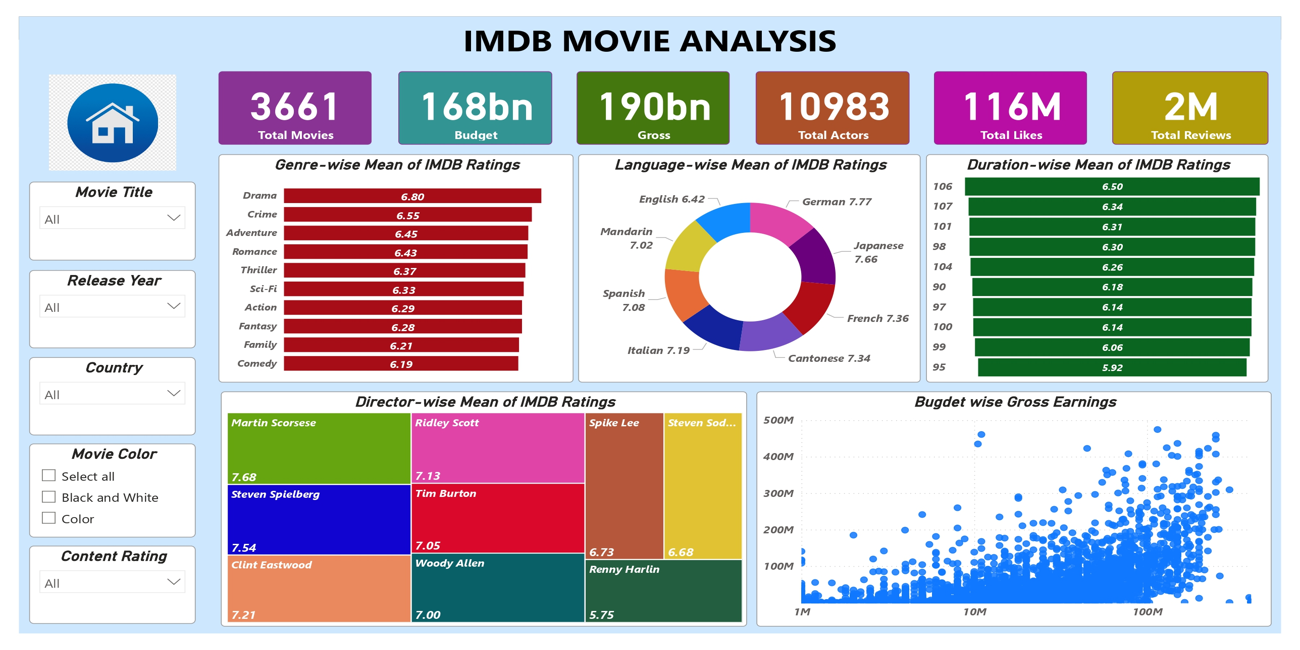

In [ ]:
response = requests.get('https://raw.githubusercontent.com/gopiashokan/IMDB-Movie-Analysis-with-PowerBI/main/Dashboards/Dashboard%201.jpg')
img = Image.open(BytesIO(response.content))
img = img.resize((1300,650))
img


1.   *The total number of movies in our dataset is 3661.*

2.   *The total number of actors (like Actor_1, Actor_2 and Actor_3) are 10983.*

3.   *Total budget of all movies are 168 billions and the Gross earnings are 190 billoins. The profit is 13.1%.*

4.   *Total likes are 116 millions and totally 2 millions reviews for all movies. When the highest number of likes indicate the quality of movies and reviews are expressing the people emotions.*

5.   *The scatter plot shows that Gross earnings are proportional to budgets and it reduced if budgets are more than 300 millions.*

1.   *Drama movies exhibit a mean IMDb rating of 6.80, reflecting the average viewer satisfaction within this genre.*


2.   *German language movies lead with a mean IMDb rating of 7.77, indicating a high level of viewer appreciation.*


3.   *Movies with a duration of 106 minutes have a mean IMDb rating of 6.50, providing insight into audience satisfaction within this specific duration.*


4.   *Films directed by Martin Scorsese boast a mean IMDb rating of 7.68, showcasing his consistent success in delivering well-received movies.*

## **descriptive statistics - Median**

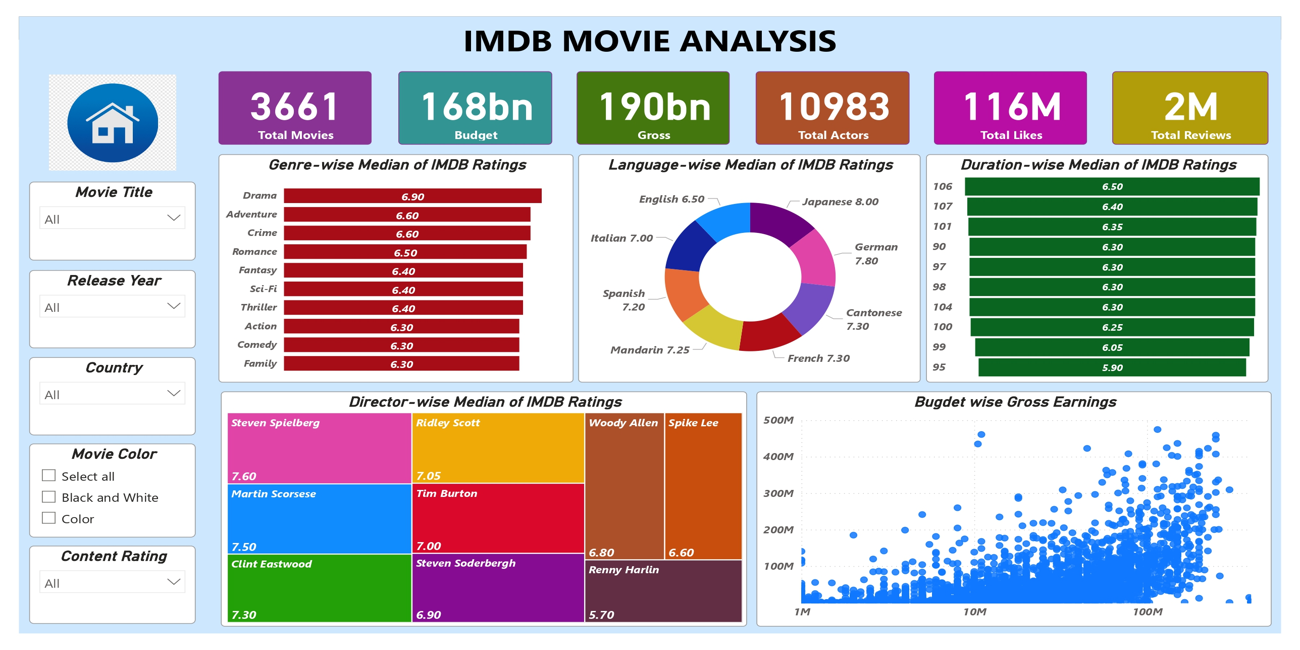

In [3]:
response = requests.get('https://raw.githubusercontent.com/gopiashokan/IMDB-Movie-Analysis-with-PowerBI/main/Dashboards/Dashboard%202.jpg')
median_img = Image.open(BytesIO(response.content))
median_img = median_img.resize((1300,650))
median_img

1.   *Median IMDb rating for Drama movies is 6.90, reflecting a consistent level of viewer satisfaction in this genre.*


2.   *Japanese language movies boast a high median IMDb rating of 8.00, indicating strong and consistent positive audience reception.*


3.   *Movies with a duration of 106 minutes have a median IMDb rating of 6.50, providing insights into audience satisfaction within this specific duration.*


4.   *Steven Spielberg's directed movies hold a median IMDb rating of 7.60, showcasing his consistent ability to produce highly-rated films.*

## **descriptive statistics - Mode**

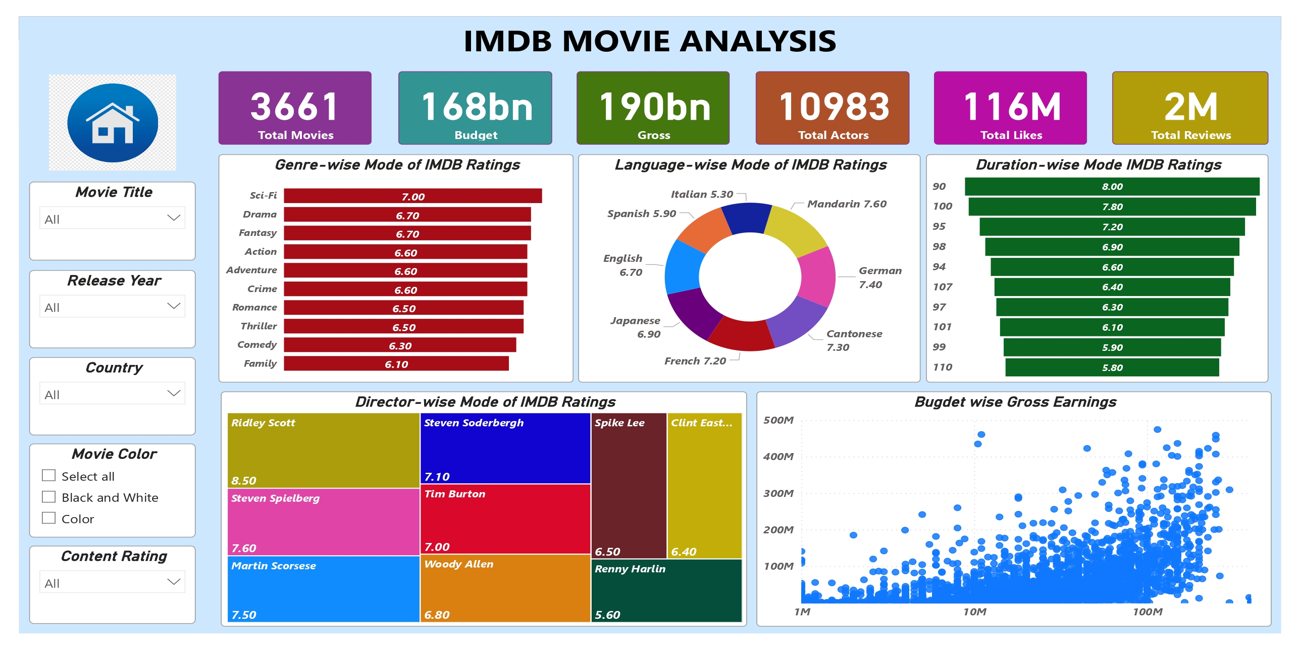

In [4]:
response = requests.get('https://raw.githubusercontent.com/gopiashokan/IMDB-Movie-Analysis-with-PowerBI/main/Dashboards/Dashboard%203.jpg')
mode_img = Image.open(BytesIO(response.content))
mode_img = mode_img.resize((1300,650))
mode_img

1.   *In the Sci-Fi genre, the mode IMDb rating is 7.00, indicating a prevalent satisfaction level among viewers for these movies.*


2.   *Mandarin language movies have a mode IMDb rating of 7.60, showcasing widespread viewer satisfaction within this language category.*


3.   *For movies with a duration of 90 minutes, the mode IMDb rating is 8.00, suggesting a common high level of satisfaction among viewers within this duration.*


4.   *Movies directed by Ridley Scott have a mode IMDb rating of 8.50, highlighting a consistent high level of viewer satisfaction under his directorial helm.*

## **descriptive statistics - Standard Deviation**

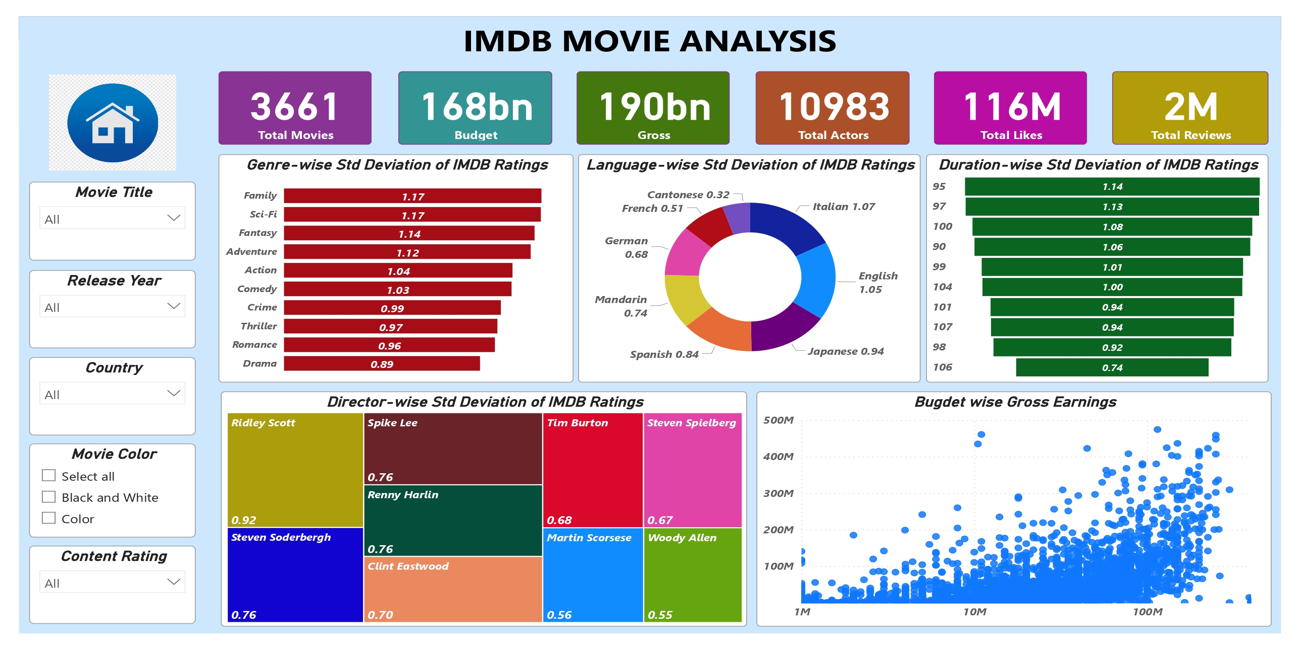

In [5]:
response = requests.get('https://raw.githubusercontent.com/gopiashokan/IMDB-Movie-Analysis-with-PowerBI/main/Dashboards/Dashboard%204.jpg')
sd_img = Image.open(BytesIO(response.content))
sd_img = sd_img.resize((1300,650))
sd_img

1.   *Family & Sci-Fi movies exhibit a standard deviation of 1.17 in IMDb ratings, reflecting variability in viewer opinions within this genre combination.*

2.   *Italian language movies display a standard deviation of 1.07 in IMDb ratings, indicating diverse audience responses to films in Italian.*

3.   *Movies with a duration of 95 minutes have a standard deviation of 1.14 in IMDb ratings, suggesting varying levels of satisfaction among viewers for films of this specific duration.*

4.   *Ridley Scott's movies show a standard deviation of 0.92 in IMDb ratings, showcasing a relatively consistent reception among viewers for films directed by Ridley Scott.*

## **descriptive statistics - Variance**

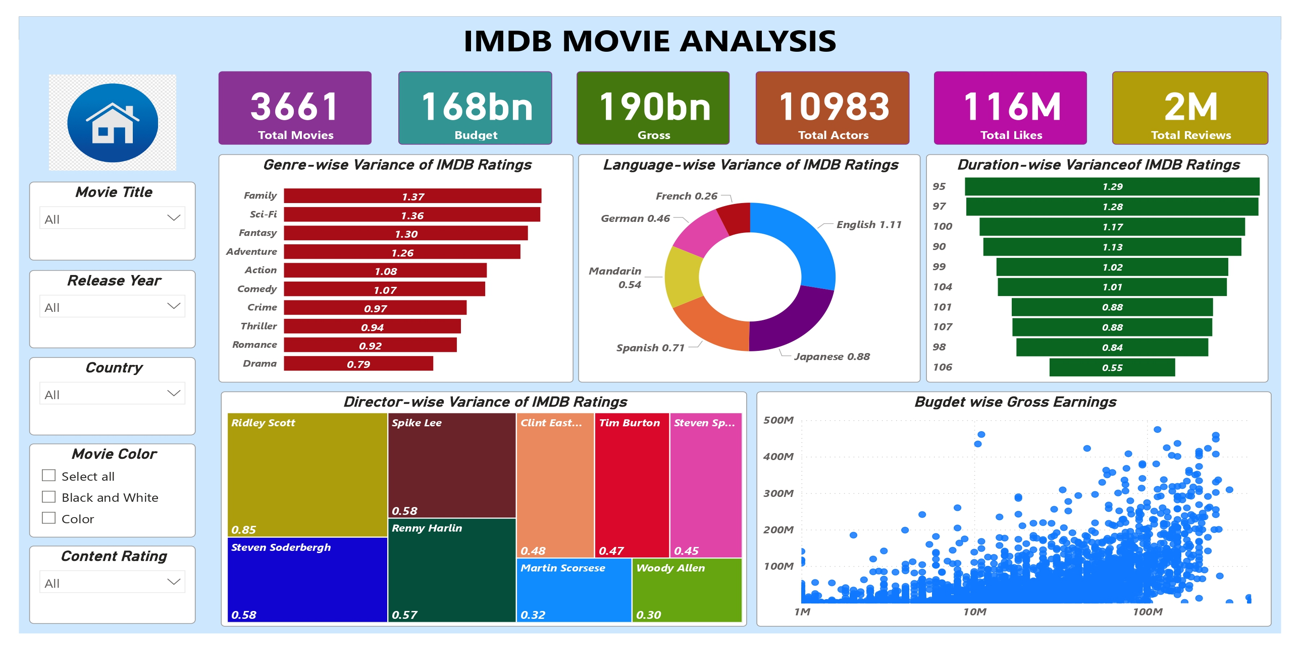

In [7]:
response = requests.get('https://raw.githubusercontent.com/gopiashokan/IMDB-Movie-Analysis-with-PowerBI/main/Dashboards/Dashboard%205.jpg')
variance_img = Image.open(BytesIO(response.content))
variance_img = variance_img.resize((1300,650))
variance_img

1.   *Family genre exhibits the highest variance in IMDb ratings with a value of 1.37, suggesting diverse audience opinions within this category.*


2.   *English language movies have a variance of 1.11 in IMDb ratings, indicating a range of viewer sentiments within the English-language film pool.*


3.   *Movies with a duration of 95 minutes show a variance of 1.29 in IMDb ratings, reflecting differing viewer reactions to films of this specific length.*


4.   *Ridley Scott's movies demonstrate a variance of 0.85 in IMDb ratings, showcasing a relatively narrower range of opinions among viewers for his directed films.*

## **descriptive statistics - Range**

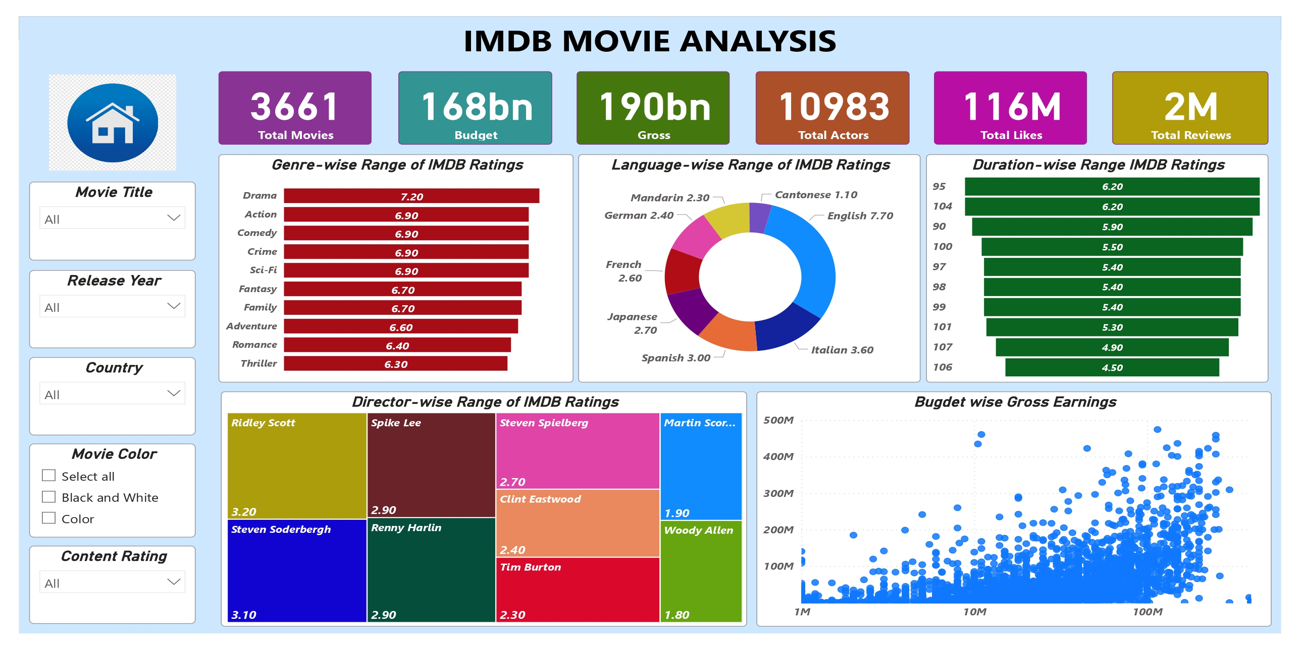

In [9]:
response = requests.get('https://raw.githubusercontent.com/gopiashokan/IMDB-Movie-Analysis-with-PowerBI/main/Dashboards/Dashboard%206.jpg')
range_img = Image.open(BytesIO(response.content))
range_img = range_img.resize((1300,650))
range_img

1.   *Drama movies exhibit a range of IMDb ratings with the lowest at 7.20, reflecting the variability in viewer satisfaction within this genre.*


2.   *English language movies have a range of IMDb ratings, and the lowest falls at 7.70, capturing the spectrum of audience opinions for movies in English.*


3.   *Movies with a duration of 95 minutes showcase a range of IMDb ratings, hitting a low point of 6.20, indicating the diversity of viewer preferences for films of this length.*


4.   *For movies directed by Ridley Scott, the range of IMDb ratings is observed, reaching the lowest point at 3.20, highlighting fluctuations in the reception of his directed films.*